In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = [7, 7]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,meshgrid,array

from scipy.integrate import quad,dblquad,tplquad

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

  - A double integral over a region $\mathcal D$ is a limit of Riemann sums 
  $$\iint_\mathcal{D} f(x,y)\,dA = \lim_{M,N\to \infty} \sum_{i=1}^M \sum_{j=1}^N f(x_{ij}^*,y_{ij}^*)\, \Delta A_{ij} $$

where $(x_{ij}^*,y_{ij}^*)$ is a sample point in the $ij$th subrectangle contained in $\mathcal{D}$ and $\Delta A_{ij}$ is the area of the $ij$th subrectangle (often $\Delta x\Delta y$).

  - Fubini's Theorem states that for a continuous $f$ on a rectangle $[a,b]\times[c,d]$, the double integral is equal to the iterated integral. 
  
  $$\iint_\mathcal D f dA = \int_a^b \int_c^d f(x,y)\, dy \,dx$$
  

<p style="padding-bottom:40%;"> </p>

### APMA E2000

# Lecture 15

## Triple Integrals/Applications


  - Objectives
    - Integration
      - Polar Coordinates
      - Triple Integrals
        - Change order of integration
      - Applications of integration:
        - Center of mass
        - Moment of inertia
        - Probability
    

  - Resources
    - Content
      - Stewart: §15.4–5
      - New Strang: [§5.6](https://openstax.org/books/calculus-volume-3/pages/5-6-calculating-centers-of-mass-and-moments-of-inertia)

    - Practice
      - Mooculus: [Mass and Moments](https://ximera.osu.edu/mooculus/calculus3/computationsAndInterpretations/digInMassMomentsAndCenterOfMass)
    - Extras
      - CalcBLUE: [Integrals](https://www.math.upenn.edu/~ghrist/BLUE.html#VOL3) 

<div style="padding-bottom: 40%"></div>

## Polar Coordinates

Note that the area of the rectangle $\{(x,y) \mid x_1 \leq x \leq x_2, y_1 \leq y \leq y_2 \}$ is 

$$\Delta A = (x_2-x_1)(y_2-y_1) = \Delta x \Delta y $$

But what about a "polar rectangle"  $\{(r \cos \theta,r \sin \theta) \mid r_1 \leq r \leq r_2, \theta_1 \leq \theta \leq \theta_2 \}$?

In [24]:
@interact
def _(s=(0,1,.1),angle=(-127,6,6)):
    fig = plt.figure(figsize=(12,6))
    ax= fig.add_subplot(121)
    ax2 = fig.add_subplot(122,projection='3d')
    r = np.linspace(1,2,8)
    th = np.linspace(0,pi/3,8)
    t = np.linspace(0,1,26)
    for x in r:
        ax.plot((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)),'g')
    for y in th:
        ax.plot((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y),'g')

    for x in r:
        ax2.plot((1-s)*x*np.ones_like(t) + s*(x*cos(t*pi/3)),(1-s)*t*pi/3 + s*(x*sin(t*pi/3)),0*t,'g')
    for y in th:
        ax2.plot((1-s)*(1+t) + s*(1+t)*cos(y),(1-s)*y*np.ones_like(t)+ s*(1+t)*sin(y),0*t,'g')
        
    for a in [ax,ax2]:
        if s == 0:
            a.set_xlabel('$r$',fontsize=20)
            a.set_ylabel('$\\theta$',fontsize=20)
        elif s == 1:
            a.set_xlabel('$x$',fontsize=20)
            a.set_ylabel('$y$',fontsize=20)
        else:
            a.set_xlabel(' ',fontsize=20)
            a.set_ylabel(' ',fontsize=20)
            
    R,TH = np.meshgrid(r,th)
    
    X = (1-s)*R + s*(R*cos(TH))
    Y = (1-s)*TH + s*(R*sin(TH))
    Z = 1 + R*cos(TH) + R*sin(TH)
    ax2.plot_surface(X,Y,Z,cmap='rainbow')
    ax2.view_init(35,angle)
   
    ax.set_xlim([0,2.5])
    ax.set_ylim([0,2.5])
    ax2.set_xlim3d([0,2.5])
    ax2.set_ylim3d([0,2.5])

interactive(children=(FloatSlider(value=0.0, description='s', max=1.0), IntSlider(value=-61, description='angl…

<p style="padding-bottom:40%;"> </p>

## Converting integrals to polar coordinates. 

Let $\mathcal{D}$ be the polar region defined by $r_1 \leq r \leq r_2, \theta_1 \leq \theta \leq \theta_2 $ and $f(x,y)$ a continuous function on $\mathcal D$. Then,

$$\iint_\mathcal D f dA = \int_{\theta_1}^{\theta_2} \int_{r_1}^{r_2} f(r \cos \theta,r \sin \theta )\,r\,dr\,d\theta$$ 



Remember to convert all parts of the integral:
  - **Where?** the limits of integration 
  - **What?** the integrand 
  - **How?** the differential

## Example

  1. Find the volume under a paraboloid $z=a^2-x^2-y^2$ and above $z=0$ in terms of $a$ where $a>0$.
  

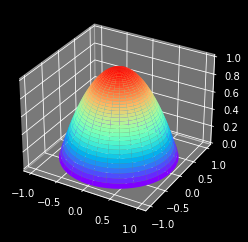

In [5]:
ax = plt.gca(projection='3d')
r = np.linspace(0,1,40)
th = np.linspace(0,2*pi,56)
r,th = np.meshgrid(r,th)
X = r*cos(th)
Y = r*sin(th)
Z = 1 - r**2
ax.plot_surface(X,Y,Z,cmap='rainbow');


<p style="padding-bottom:40%;"> </p>

### Cool Example

Compute $$\int_{-\infty}^\infty e^{-x^2}\,dx.$$

<p style="padding-bottom:40%;"> </p>

# Applications of Integration

The basic principal behind applying integration is that the desired quantity, the <i>desideratum</i>, is obtained by integrating its <i>elements</i>. Put succinctly,

$$\spadesuit = \int d\spadesuit$$

<p style="padding-bottom:40%;"> </p>

## A Word on Density

"Density" often stands in for mass density which has units of mass/volume, like $\frac{{\rm g}}{{\rm ml}}$. 

But think of it more generally as $$\frac{\rm stuff}{\rm unit\ of\ measure}$$

Further, these can vary continuously throughout a medium or space. Thus, we integrate to find the total amount of "stuff". 

<p style="padding-bottom:40%;"> </p>

### Examples

  - Resistivity $\rho(x)$ along a wire, $\frac{\Omega}{{\rm m}}$. $$\Omega = \int_0^\ell \rho(x)\, dx$$

  - Probability density function $\rho(x,y)$ of two random variables. $$P(E) = \iint_E \rho(x,y)\, dA$$

  - Concentration of chemicals, like $[\text{H}_2\text{CO}_3] = \rho(x,y,z)$. $$\text{total carbonic acid} = \iiint_D \rho(x,y,z)\,dV$$

<p style="padding-bottom:40%;"> </p>

## Masses and Moments

Consider a two mass system in one dimension. That is suppose a mass $m_1$ is at position $x_1$ and mass $m_2$ is at position $x_2$.

The total mass is of course

$$M = m_1 + m_2.$$

The **center of mass** is the point $\bar x$ that balances the torque. That is,

$$m_1(x_1 - \bar x) + m_2(x_2 - \bar x) =0$$

$$\bar x = \frac{m_1x_1 + m_2x_2}{m_1 + m_2}$$

$$ = \frac{m_1}{M}x_1 + \frac{m_2}{M}x_2$$

<p style="padding-bottom:40%;"> </p>

## Masses and Moments

<img src="https://culinarylore.com/wp-content/uploads/2014/02/waiter-drinks-tray.jpg" width="30%" style="float: right">
                                                                                                                      
Let consider a planar region $\mathcal D$ (a "lamina") with continuously varying density (mass per unit area) $\rho(x,y)$. The the total mass is given by $$M = \iint_D \rho(x,y)\,dA$$ 

The **center of mass** $(\bar{x},\bar y)$ is the "(weighted) average position" of the mass in the object. 
$$(\bar{x},\bar y) = \left(\frac{M_y}{M},\frac{M_x}{M}\right)$$ 

where 

$$ M_y = \iint_\mathcal D x \rho(x,y)\,dA$$ 

$$ M_x = \iint_\mathcal D y \rho(x,y)\,dA$$

are the **first moments** relative to the $y$- and $x$-axes, respectively.

## Center of mass

More concisely, 

$$(\bar{x},\bar y) = \left(\frac{\iint_\mathcal D x \rho(x,y)\,dA}{\iint_\mathcal D \rho(x,y)\,dA},\frac{\iint_\mathcal D y \rho(x,y)\,dA}{\iint_\mathcal D  \rho(x,y)\,dA}\right)$$ 


<p style="padding-bottom:40%;"> </p>

### Example

Find the center of mass of the unit square $[0,1]\times [0,1]$ whose density is given by $\rho(x,y) = x+y$ 

In [27]:
@interact
def _(show=False):
    x = y = np.linspace(0,1,100)
    x,y = np.meshgrid(x,y)

    plt.figure(figsize=(8,8))
    plt.pcolormesh(x,y,x+y,cmap='rainbow',shading='gouraud')
    plt.xlim([0,1.5])
    plt.ylim([0,1.5])
    if show:
        plt.scatter([7/12],[7/12],zorder=2)


interactive(children=(Checkbox(value=False, description='show'), Output()), _dom_classes=('widget-interact',))

In [14]:
M = dblquad(lambda y,x: x+y,0,1,0,1)[0]

In [15]:
ybar = 1/M*dblquad(lambda y,x: (x+y)*y,0,1,0,1)[0]

In [16]:
dblquad(lambda y,x: x+y,0,1,0,1)

(1.0, 1.662923778137264e-14)

<p style="padding-bottom:40%;"> </p>

## Moment(s) of Inertia

The **moment of inertia** $I$ of a massive body is a measure of its "resistance to rotation" about a given axis. 

Angular momentum is  $L=I\omega$, the product of the moment of inertia and the angular velocity.

![Figure skater spinning](http://giphygifs.s3.amazonaws.com/media/RmuN3xF9sBpL2/giphy.gif)

The figure skater pulls her body in to reduce her moment of intertia. As angular momentum is conserved, she spins faster.

### Formula

$I$ is a measurement of how far the mass is spread from the axis. It is the second moment of the density distribution. 

If we take a body $\mathcal D$ in the plane with area density $\rho(x,y)$, and consider it rotating about the origin, then

$$ I = \iint_\mathcal D (x^2+y^2)\rho(x,y)\,dA $$

that is, the distance to the axis squared, weighted by mass. 


<p style="padding-bottom:40%;"> </p>

#### Exercise

Let's compute the moment of inertia of the square above about:
  - the origin
  - the $y$-axis

In [17]:
dblquad(lambda y,x: (x**2 + y**2)*(x + y),0,1,0,1)

(0.8333333333333334, 2.3025363234819638e-14)

In [18]:
dblquad(lambda y,x: (x**2)*(x + y),0,1,0,1)

(0.41666666666666663, 1.655709812050779e-14)

In [19]:
@interact(t=(0.,2*pi,pi/10))
def _(t=0):
    x = linspace(0,1)
    x,y = meshgrid(x,x)
    plt.figure(figsize=(6,6))
    ax = plt.gca(projection='3d')
    ax.plot_surface(x*cos(t) - y*sin(t),x*sin(t) + y*cos(t),0*x)
    ax.plot_surface(x*cos(2*t),y,x*sin(2*t))
    ax.plot([0,0],[-1,1],[0,0],'--k')
    ax.plot([0,0],[0,0],[-1,1],'--k')
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(FloatSlider(value=0.0, description='t', max=6.283185307179586, step=0.3141592653589793),…

# Probability

Two (real) random variables $X$ and $Y$ have a joint probability density function $\rho(x,y)$. This is simply a function on the plane with $\rho(x,y) \geq 0$ and 

$$\iint_{\RR^2} \rho(x,y)\,dA = 1.$$

An **event** $E \subset \RR^2$ is just a subset of the sample space, and its probability is 

$$P(E) = \iint_E \rho(x,y)\,dA$$.

## Example

What is the probability that 2 numbers randomly chosen between 0 and 1 have a product greater than $\frac12$?

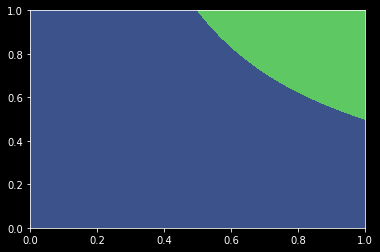

In [20]:
x = y = np.linspace(0,1,50)
x,y = np.meshgrid(x,y)
plt.contourf(x,y,x*y ,levels=[0,1/2,1]);

In [21]:
dblquad(lambda y,x: 1, 1/2,1,lambda x: 1/(2*x),1)[0]

0.15342640972002736

In [22]:
1/2-log(2)/2

0.15342640972002736

## The Moments 

Moment measurements have analogous meaning in the probability context.

The "center of mass" is in fact the **expected value** of the variables.

$$(\bar{x},\bar{y}) = \left( \iint_{\RR^2} x \rho(x,y)\,dA,\iint_{\RR^2} y \rho(x,y)\,dA\right) $$

The second moments (relative to this center) give the **variances** of the respected variables. 

$$(\sigma_x^2,\sigma_{y}^2) = \left( \iint_{\RR^2} (x-\bar{x})^2 \rho(x,y)\,dA,\iint_{\RR^2} (y-\bar{y})^2 \rho(x,y)\,dA\right) $$

The list goes on 

  - mixed moments $\to$ covariance
  - 3rd moments $\to$ skewedness
  - 4th moments $\to$ kurtosis
  - $\ldots$